# Main Script: Asteroid Selection

## Import Packages

In [1]:
import asteroid_db
import asteroid_orbital
import asteroid_products
import asteroid_decision

## User requirements

In [2]:
H_min=29.5 #Min absolute magnitude of asteroid analysed
H_max=30 #Man absolute magnitude of asteroid analysed
date_app_min='2030-01-01' #Min close-approach date
date_app_max='2035-01-01' #Max close-approach date
dist_app=0.2 #Close approach definition threshold [AU]
filter=0 #If=0 raw asteroid database; if=1 only PHA with spin OR taxonomy OR with secondary body are considered/
         # =0 recomended for small asteroids =1 for asteroid with D>100m

## Asteroid databases loading from asteroid_db module

In [3]:
asteroid, asteroid_all, asteroid_app, asteroid_NHATS, asteroid_geometry, input_file = \
                             asteroid_db.asteroid_load(H_min,H_max,date_app_min,date_app_max,dist_app)
asteroid_removed=[] #Initialization; no candidates excluded atm

## Compute solutions only for asteroid with close approaches in the determined period

In [4]:
for n_ast in range(len(asteroid)-1,-1,-1): #Iterate from the last element

    # Remove NO close approachers and check if additional info is available
    cont,approaches,is_NHATS,is_geometry=asteroid_db.asteroid_filtering(filter,n_ast,asteroid, asteroid_removed,asteroid_app,asteroid_NHATS, asteroid_geometry)
    if cont==0: continue #Remove asteroid as candidate and continue
    
    # Compute accesibility via delta_v [m/s]]
    delta_v_tot=asteroid_orbital.asteroid_accessibility(n_ast, asteroid)

    # Compute orbit similarity/afinity
    g_2,familiar=asteroid_orbital.asteroid_similarity(n_ast,asteroid,asteroid_all)
    
    # Compute synodic period [years]
    period_sin=asteroid_orbital.asteroid_period(n_ast,asteroid)
    
    # Include results in the available info
    asteroid[n_ast].extend([delta_v_tot, period_sin, g_2, familiar, approaches, is_NHATS, is_geometry])


## Generate solution csv, simplified table and plots

+--------------+--------------------+-------------------+--------------------+------------------------------------------------------------------------------------+
|   Asteroid   | Accesibility [m/s] | Orbit Uncertainty | Synodic Period [y] |                                  Additional Info                                   |
+--------------+--------------------+-------------------+--------------------+------------------------------------------------------------------------------------+
|  (2008 WO2)  |       327.26       |         6         |       27.38        |                           ['Included in NHATS database']                           |
| (2011 AM37)  |       718.94       |         6         |        7.48        |                           ['Included in NHATS database']                           |
| (2014 WX202) |       219.47       |         2         |       19.58        |                           ['Included in NHATS database']                           |
|  (2018 TV5)  |

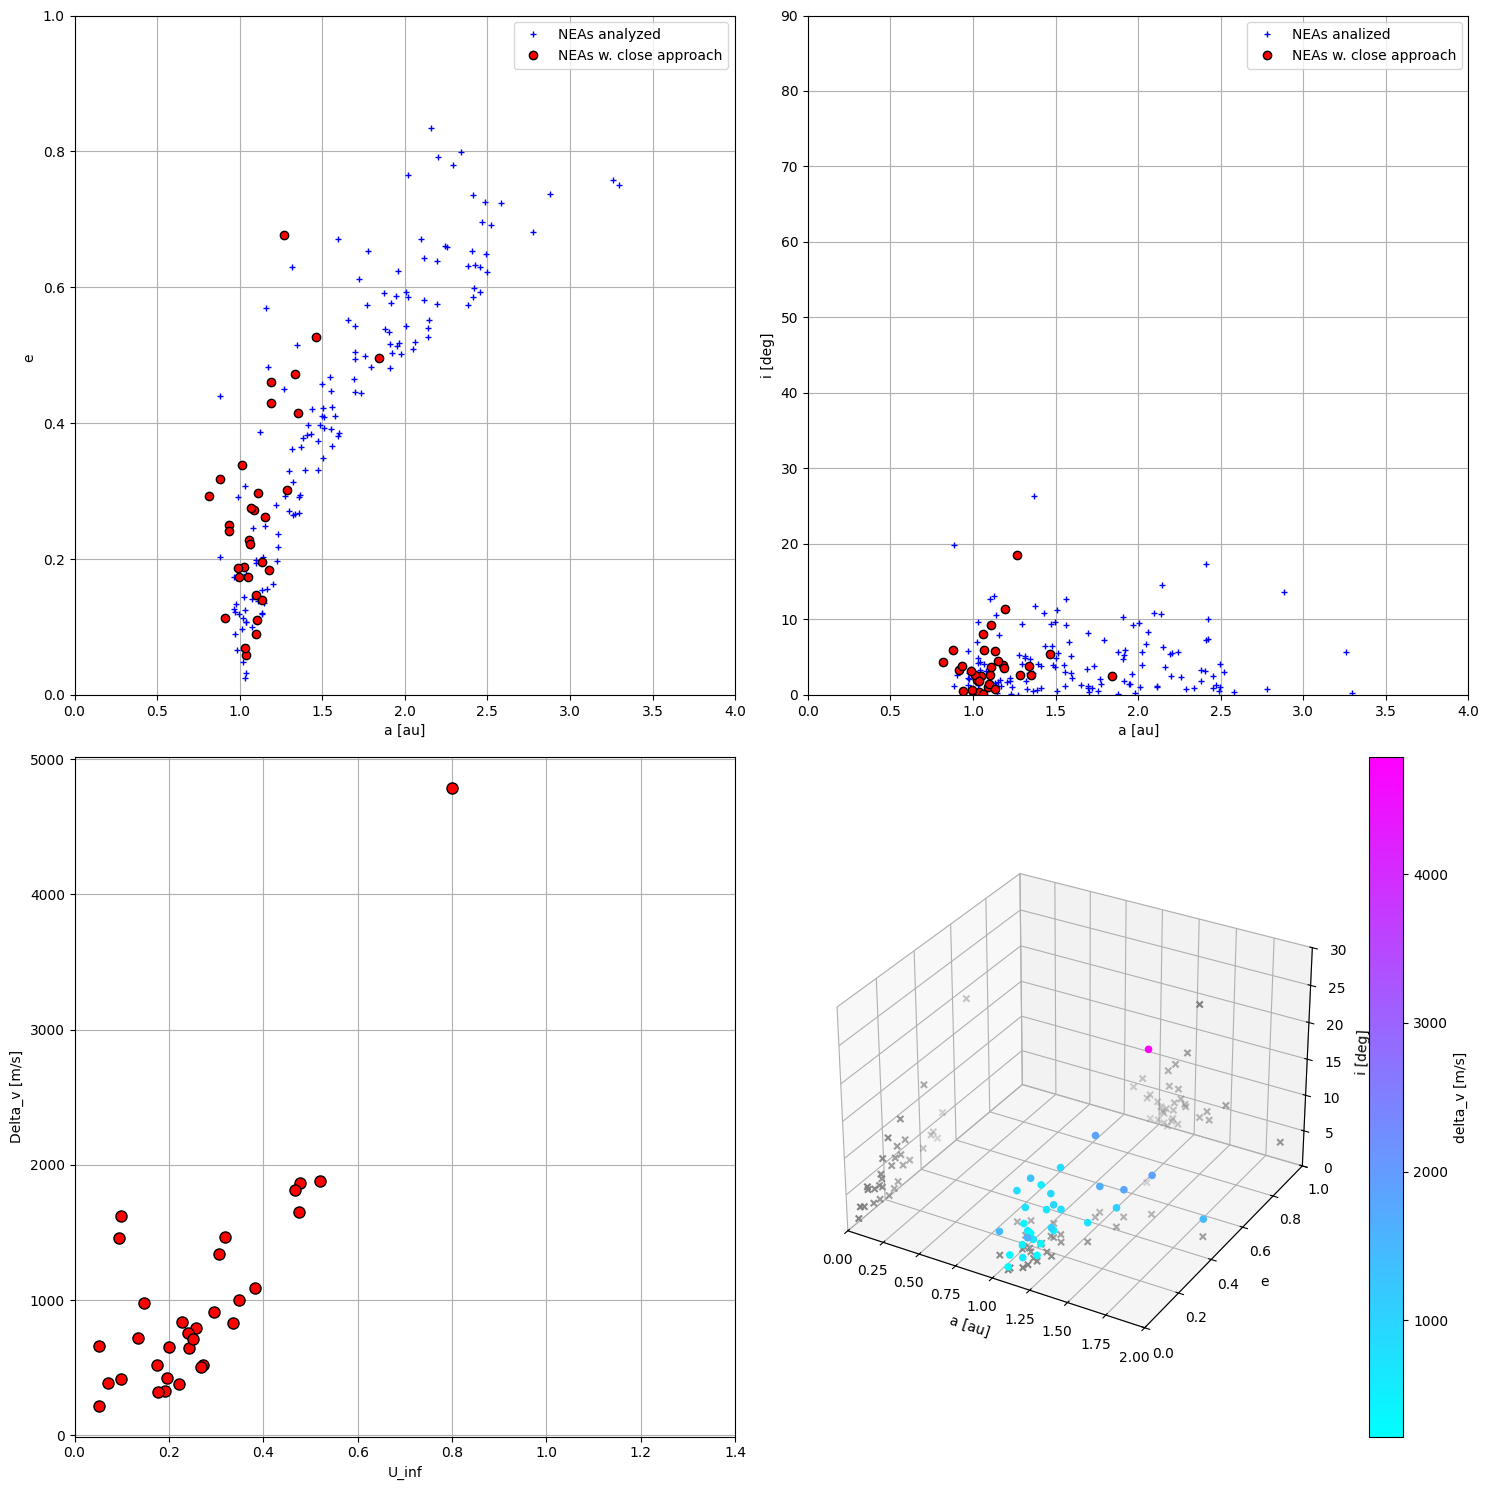

In [5]:
asteroid_products.asteroid_out(H_min,H_max,date_app_min,date_app_max,asteroid,asteroid_removed)     

## MCDM Problem: 

Criteria by columns eg Accesibility, Condition Code, Synodic Per 

In [6]:
decision_table=[[float(asteroid[n_ast][16]), float(asteroid[n_ast][11]), float(asteroid[n_ast][17])] for n_ast in range(len(asteroid))]
criterion_type= ['min','min','min'] #Select the kind of criteria for all criteria
weights=asteroid_decision.weights_merec(decision_table,criterion_type)

print(decision_table)
print(weights)

[[327.25547977970893, 6.0, 27.384744625110415], [718.9372551916811, 6.0, 7.476942898636839], [219.46922415323363, 2.0, 19.581158824559534], [1881.6444138121421, 6.0, 2.293088897671591], [522.3728283793695, 5.0, 8.326155646344848], [319.1394748897053, 6.0, 13.933037438771434], [4785.994148120294, 7.0, 3.3453452999106674], [840.2843650401799, 6.0, 2.792612429327324], [1467.868602636066, 7.0, 1.6646014914667804], [998.7741707188967, 6.0, 58.87875066636547], [650.4317362337576, 7.0, 5.849279696651747], [1460.9757967021574, 5.0, 6.831455560648513], [524.0523777058975, 4.0, 113.16344335437961], [978.3901924885369, 6.0, 4.555629425234111], [913.6256048303187, 6.0, 10.543941100436774], [792.8856114575681, 7.0, 5.22724320149356], [425.69789746743555, 5.0, 58.07811635027348], [1618.8973083442697, 1.0, 7.095546846033919], [506.3396901292508, 6.0, 12.075149243065605], [1342.9988902022574, 5.0, 4.705461671531351], [662.6369002235987, 6.0, 7.712463677199999], [1648.705941322933, 6.0, 4.4150245672837